# Final Project
### Halina Vercessi-Clarke and Hannah Nguyen

In [1]:
#importing the libraries
import os 
import cv2
import numpy as np
from skimage import io
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pathlib

#importing scikit learning modules
from sklearn.model_selection import train_test_split


In [97]:
file_path = os.getcwd() + '\images'
data_dir = tf.keras.utils.get_file(origin=file_path, 
                                   fname='images', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/Hannah PC/.keras/datasets/images')

In [20]:

# file_path = 'C:/Users/Halina/Documents/GitHub/Fashion-throughout-the-Years/images'
file_path = os.getcwd() + '\images'
data = [] 
labels = []
i = 0
label_names = os.listdir(file_path)
for root, dirs, files in os.walk(file_path):
    path = str(root).replace(str(chr(92)), "/")
    if (path.split("/")[-1]!='images'):
        for img in os.listdir(path):
            # print(label_names[i])
            pic = cv2.imread(os.path.join(path,img))
            #print(img)
            
    
#             input_arr = np.array([input_arr])  # Convert single image to a batch
            pic = cv2.resize(pic,(80,80))
            pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
            data.append(pic)
            
#             pic = tf.keras.preprocessing.image.load_img(os.path.join(path,img), grayscale=False, color_mode="rgb", target_size=(80,80), interpolation="nearest")
#             input_arr = tf.keras.preprocessing.image.img_to_array(pic)
#             data.append(input_arr)


            year = label_names[i].split(" ")[0]
            labels.append(year)
        i+=1
        

In [50]:
tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)



In [21]:
data = np.asarray(data)
labels = np.asarray(labels)
#print(data[344])
#print(labels[344])
data[0].flatten()

array([24, 13,  9, ..., 97, 88, 81], dtype=uint8)

In [22]:
print(data[344].shape)
#plt.imshow(saved[0].reshape(80,80,3))
data[344]

(80, 80, 3)


array([[[255, 253,  94],
        [255, 255, 109],
        [253, 250, 109],
        ...,
        [255, 255, 121],
        [255, 254, 127],
        [255, 254, 127]],

       [[253, 246,  93],
        [251, 249,  93],
        [255, 255,  96],
        ...,
        [255, 255, 122],
        [255, 254, 128],
        [254, 255, 135]],

       [[255, 249,  93],
        [255, 255, 109],
        [255, 247, 136],
        ...,
        [255, 255, 130],
        [255, 255, 133],
        [253, 255, 140]],

       ...,

       [[207, 182, 186],
        [196, 165, 190],
        [207, 182, 206],
        ...,
        [253, 233, 243],
        [241, 223, 227],
        [249, 221, 235]],

       [[202, 172, 183],
        [218, 191, 209],
        [208, 180, 196],
        ...,
        [246, 226, 240],
        [235, 215, 234],
        [231, 207, 222]],

       [[194, 155, 184],
        [203, 180, 188],
        [191, 169, 185],
        ...,
        [255, 239, 252],
        [245, 218, 237],
        [239, 212, 234]]

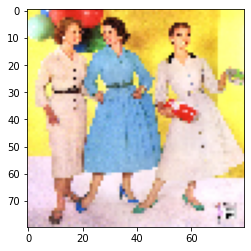

In [23]:
plt.imshow(data[344].reshape(80, 80, 3))

In [24]:
# Split the dataset
train_images, test_images, train_labels, test_labels = train_test_split(data, labels, test_size = 0.25, random_state = 0)

In [25]:
train_images.shape

(975, 80, 80, 3)

In [26]:
test_images.shape

(325, 80, 80, 3)

In [27]:
train_labels.shape

(975,)

In [28]:
test_labels.shape

(325,)

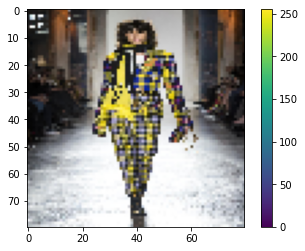

In [29]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [30]:
train_images = train_images / 255.0

test_images = test_images / 255.0


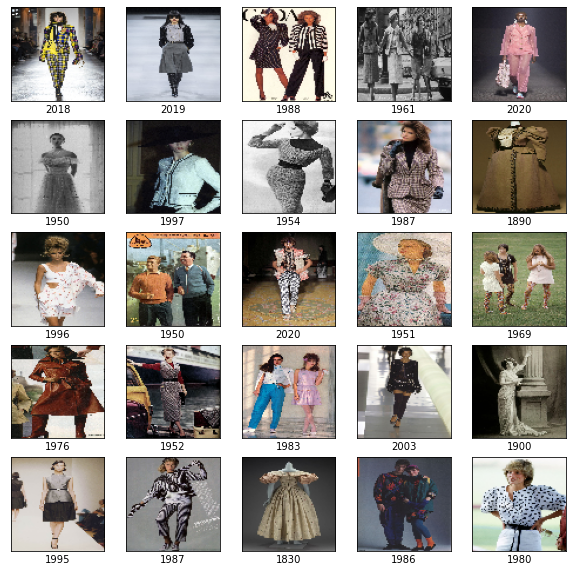

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()


In [37]:
data.experimental.preprocessing.Rescaling(1./255, input_shape=(80, 80, 3))

AttributeError: 'numpy.ndarray' object has no attribute 'experimental'

In [49]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(80, 80, 3)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(87)
# ])
model = tf.keras.Sequential([
                    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(80, 80, 3)),
                    #tf.keras.layers.Flatten(),
                    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),  
                    tf.keras.layers.MaxPooling2D(),  
                    
#                     tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),  
#                     tf.keras.layers.MaxPooling2D(),  
                    
#                     tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),  
#                     tf.keras.layers.MaxPooling2D(),  
                    
                    #tf.keras.layers.Flatten(),  
                    tf.keras.layers.Dense(128, activation='relu'),  
                    tf.keras.layers.Dense(87)
])


model = Sequential([  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  layers.Conv2D(16, 3, padding='same', activation='relu'),  layers.MaxPooling2D(),  layers.Conv2D(32, 3, padding='same', activation='relu'),  layers.MaxPooling2D(),  layers.Conv2D(64, 3, padding='same', activation='relu'),  layers.MaxPooling2D(),  layers.Flatten(),  layers.Dense(128, activation='relu'),  layers.Dense(num_classes)])



In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [51]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


UnimplementedError:  Cast string to float is not supported
	 [[node sparse_categorical_crossentropy/Cast (defined at <ipython-input-51-93ea666c821d>:1) ]] [Op:__inference_train_function_2487]

Function call stack:
train_function


In [55]:
data.head

AttributeError: 'numpy.ndarray' object has no attribute 'head'